Importing Libraries 

In [26]:
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from argparse import Namespace
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


MAGNITUDE = True
SEED = 0

Loading data

In [27]:

def load_data(data_dir, return_mag=True):
    data = scipy.io.loadmat(data_dir)
    d, t,r = data['data'], data['target'],data['gases_ratios']
    r = r[:, -1].reshape(-1, 1) # taking only the last columns 
    if return_mag:
        d = np.abs(d)
    else:
        dreal = np.real(d)
        dimg = np.imag(d)
        d = np.concatenate([dreal, dimg], axis=1)
    return d.astype(np.float32), t.astype(np.float32),r.astype(np.float32)
pca_2d = PCA(n_components=2)
scaler = StandardScaler() 

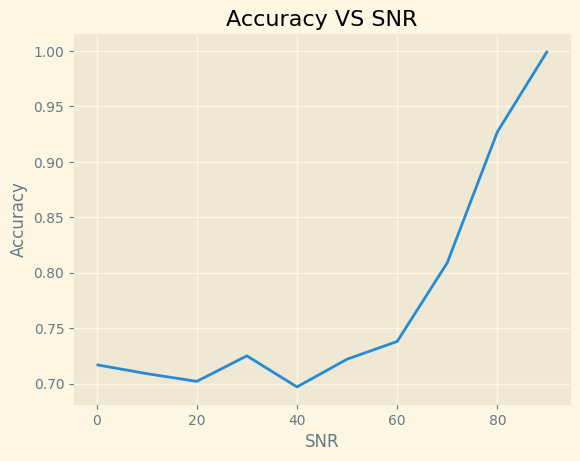

In [38]:
ALL_TRAIN_X = []
ALL_TRAIN_Y = []
ALL_TEST_X = []
ALL_TEST_Y = []
for i in range(0,101,10):
    if i<10:
        DATA_DIR_i = f"SNR_VS_ACC/SNR_{1}.mat"
    else:
        DATA_DIR_i = f"SNR_VS_ACC/SNR_{i}.mat"
    f, l,r = load_data(DATA_DIR_i, MAGNITUDE)
    ALL_TRAIN_X.append(f)  
    ALL_TRAIN_Y.append(l)
    ALL_TEST_X.append(f)
    ALL_TEST_Y.append(l)

RES = [] # expected to be of dimensions (21,100)
# ALL_X_CUM = np.empty((0, ALL_TRAIN_X[0].shape[1]))
# ALL_Y_CUM = np.empty((0, ALL_TRAIN_Y[0].shape[1]))
for i in range(0,10):
    # if ALL_X_CUM.size == 0: 
    #     ALL_X_CUM = ALL_TRAIN_X[i] 
    # else:
    #     ALL_X_CUM = np.concatenate((ALL_X_CUM, ALL_TRAIN_X[i]), axis=0)  
    # if ALL_Y_CUM.size == 0:
    #     ALL_Y_CUM = ALL_TRAIN_Y[i]
    # else:
    #     ALL_Y_CUM = np.concatenate((ALL_Y_CUM, ALL_TRAIN_Y[i]), axis=0)

    X_train = ALL_TRAIN_X[i]
    y_train = ALL_TRAIN_Y[i].squeeze()
    X_train_sc = scaler.fit_transform(X_train)
    X_train_sc_pca_2 = pca_2d.fit_transform(X_train_sc)
    LOG_2 = LogisticRegression()
    LOG_2.fit(X_train_sc, y_train) 
    
    X_test = ALL_TEST_X[i]
    y_test = ALL_TEST_Y[i].squeeze()
    X_test_sc = scaler.transform(X_test)
    X_test_sc_pca_2 = pca_2d.transform(X_test_sc)
    acc_test_LOG_2 = accuracy_score(y_test, LOG_2.predict(X_test_sc))
    RES.append(acc_test_LOG_2)
x = np.arange(start=0, stop=100, step=10)
plt.title("Accuracy VS SNR")
plt.xlabel("SNR")
plt.ylabel("Accuracy")
plt.plot(x,RES)

Splitting the Data for Classification

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, labels) # for classification

In [ ]:
DATA_DIR_i = f"SNR_VS_ACC/.mat"
f, l,r = load_data(DATA_DIR_i, MAGNITUDE)

PCA and TSNE

In [30]:
tsne = TSNE(n_components=2,
            init='pca',
            learning_rate='auto',
            n_iter_without_progress=10)


Scaling + pca

In [31]:
scaler = StandardScaler() 
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


X_train_sc_pca = pca.fit_transform(X_train_sc)
X_test_sc_pca = pca.transform(X_test_sc)

Visulaizing the data using PCA and TSNE

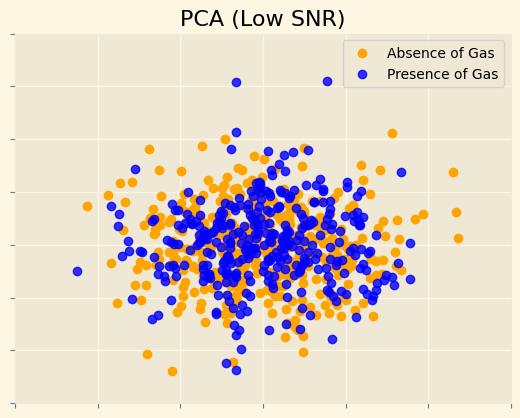

In [32]:
mask_zero = y_train.squeeze() == 0 # y_train is 3750,1 turned into 3750,0
mask_one = ~ mask_zero
plt.style.use("Solarize_Light2")
sc0 = plt.scatter(X_train_sc_pca[mask_zero, 0],X_train_sc_pca[mask_zero, 1], color='orange',alpha=1)
sc1 = plt.scatter(X_train_sc_pca[mask_one, 0], X_train_sc_pca[mask_one, 1], color='b',alpha =0.8)
plt.legend([sc0, sc1], ['Absence of Gas', 'Presence of Gas'])
plt.xticks(ticks=plt.xticks()[0], labels=['']*len(plt.xticks()[0]))
plt.yticks(ticks=plt.yticks()[0], labels=['']*len(plt.yticks()[0]))
plt.title("PCA (Low SNR)")
plt.show()



# embedding = tsne.fit_transform(X_train_sc)
# mask_zero = y_train.squeeze() == 0
# mask_one = ~ mask_zero
# sc0 = plt.scatter(embedding[mask_zero, 0], embedding[mask_zero, 1], color='r',alpha = 0.5)
# sc1 = plt.scatter(embedding[mask_one, 0], embedding[mask_one, 1], color='g',alpha=0.5)
# plt.legend([sc0, sc1], ['class0', 'class1'])
# plt.title("Embedding Using tsne projection")
# plt.show()
# tsne_3d = TSNE(n_components=3,
#             init='pca',
#             learning_rate='auto',
#             n_iter_without_progress=10)


# embedding = tsne_3d.fit_transform(X_train_sc)
# mask_zero = y_train.squeeze() == 0
# mask_one = ~ mask_zero

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# p1 = ax.scatter(embedding[mask_zero, 0], embedding[mask_zero, 1], embedding[mask_zero, 2], color='r')
# p2 = ax.scatter(embedding[mask_one, 0], embedding[mask_one, 1], embedding[mask_one, 2], color='g')
# plt.legend([p1, p2], ['class0', 'class1'])
# plt.title("Embedding 3d Using tsne projection")
# plt.show()

Logistic Regression

In [33]:
LOG = LogisticRegression()
LOG.fit(X_train_sc, y_train.squeeze()) 
acc_train_LOG = accuracy_score(y_train.squeeze(), LOG.predict(X_train_sc))
acc_test_LOG = accuracy_score(y_test.squeeze(), LOG.predict(X_test_sc))
print(f"train accuracy: {acc_train_LOG:.3f}, test accuracy {acc_test_LOG:.3f}")

train accuracy: 0.745, test accuracy 0.528


Quadratic Discriminant Analysis (QDA)

In [34]:
QDA = QuadraticDiscriminantAnalysis(reg_param=1e-4)
QDA.fit(X_train_sc, y_train.squeeze()) 
acc_train_QDA = accuracy_score(y_train, QDA.predict(X_train_sc))
acc_test_QDA = accuracy_score(y_test, QDA.predict(X_test_sc))
print(f"train accuracy: {acc_train_QDA:.3f}, test accuracy {acc_test_QDA:.3f}")   

train accuracy: 1.000, test accuracy 0.504
